In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

2023-04-20 19:13:29.996216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 19:13:35.289238: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/akhilesh/catkin_ws/devel/lib:/opt/ros/melodic/lib
2023-04-20 19:13:35.289315: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-20 19:13:46.033119: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvi

In [2]:
df = pd.read_csv('fer2013/fer2013.csv')

In [3]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [4]:
img = df['pixels'][0]
val = img.split(" ")
image = []
for i in range(len(val)):
    image.append(int(val[i]))
final = np.array(image).reshape(48,48)
final

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]])

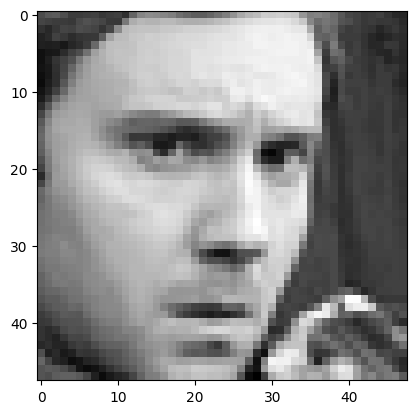

In [5]:
plt.imshow(final,cmap='gray',interpolation = 'nearest')

In [6]:
x = df[df['Usage']=='Training']['pixels']
# X_train_int = 
X_train = []
for i in range(len(x)):
    val = x[i].split(" ")
    X_train_int = []
    for j in range(len(val)):
        X_train_int.append(int(val[j]))
    X_train.append(np.array(X_train_int).reshape(48,48))
X_train = np.array(X_train)
X_train

array([[[ 70,  80,  82, ...,  52,  43,  41],
        [ 65,  61,  58, ...,  56,  52,  44],
        [ 50,  43,  54, ...,  49,  56,  47],
        ...,
        [ 91,  65,  42, ...,  72,  56,  43],
        [ 77,  82,  79, ..., 105,  70,  46],
        [ 77,  72,  84, ..., 106, 109,  82]],

       [[151, 150, 147, ..., 129, 140, 120],
        [151, 149, 149, ..., 122, 141, 137],
        [151, 151, 156, ..., 109, 123, 146],
        ...,
        [188, 188, 121, ..., 185, 185, 186],
        [188, 187, 196, ..., 186, 182, 187],
        [186, 184, 185, ..., 193, 183, 184]],

       [[231, 212, 156, ...,  44,  27,  16],
        [229, 175, 148, ...,  27,  35,  27],
        [214, 156, 157, ...,  28,  22,  28],
        ...,
        [241, 245, 250, ...,  57, 101, 146],
        [246, 250, 252, ...,  78, 105, 162],
        [250, 251, 250, ...,  88, 110, 152]],

       ...,

       [[ 74,  81,  87, ..., 189, 191, 192],
        [ 78,  82,  89, ..., 185, 189, 193],
        [ 81,  86,  94, ..., 176, 185, 193

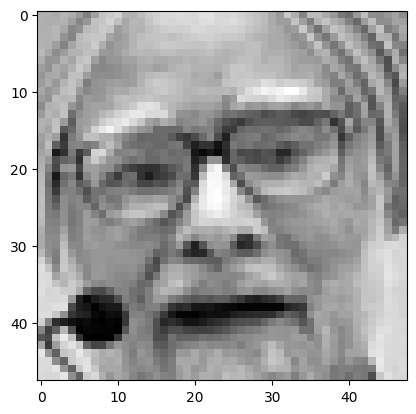

In [7]:
plt.imshow(X_train[1],cmap = 'gray')

In [8]:
x1=df[df['Usage']=='PublicTest']['pixels']
# x1[28709]
X_test = []
for i in range(28709,28709+len(x1)):
    val = x1[i].split(" ")
    X_test_int = []
    for j in range(len(val)):
        X_test_int.append(int(val[j]))
    X_test.append(np.array(X_test_int).reshape(48,48))
X_test = np.array(X_test)
X_test

array([[[254, 254, 254, ...,  16,   0, 161],
        [254, 254, 254, ...,  17,   0, 122],
        [254, 254, 254, ...,  26,   0, 114],
        ...,
        [ 66,  86,  99, ..., 255, 252, 254],
        [ 84,  92,  92, ..., 236, 255, 255],
        [ 93,  90,  85, ...,  42, 129, 180]],

       [[156, 184, 198, ..., 157, 154, 150],
        [146, 182, 199, ..., 161, 154, 150],
        [135, 176, 195, ..., 165, 161, 155],
        ...,
        [ 28,  25,  21, ..., 179, 175, 173],
        [ 29,  18,  22, ..., 177, 172, 169],
        [ 21,  14,  23, ..., 172, 167, 161]],

       [[ 69, 118,  61, ..., 118, 124, 144],
        [ 66, 115,  57, ..., 129, 123, 131],
        [ 64, 116,  61, ..., 136, 140, 136],
        ...,
        [114,  87, 136, ...,  98,  84,  86],
        [114,  85, 140, ...,  89,  84,  88],
        [114,  87, 145, ...,  88,  87,  90]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

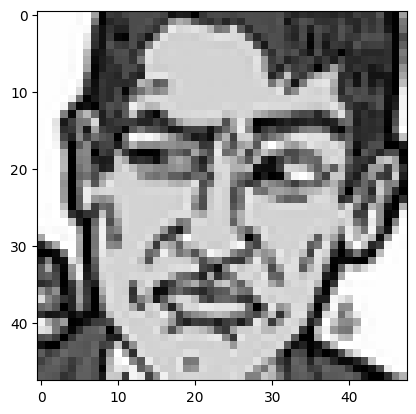

In [9]:
plt.imshow(X_test[0],cmap='gray',interpolation = 'nearest')

In [10]:
y = df[df['Usage']=='Training']['emotion']
Y_train  = [[] for i in range(len(y))]
for i in range(len(y)):
    Y_train[i].append(y[i])
Y_train = np.array(Y_train)
Y_train

array([[0],
       [0],
       [2],
       ...,
       [4],
       [0],
       [4]])

In [11]:
y1 = df[df['Usage']=='PublicTest']['emotion']
y1[28709]

Y_test  = [[] for i in range(len(y1))]
for i in range(28709,28709+len(y1)):
    Y_test[i-28709].append(y1[i])
Y_test = np.array(Y_test)
Y_test

array([[0],
       [1],
       [4],
       ...,
       [4],
       [4],
       [4]])

In [12]:
model = models.Sequential([
    layers.Rescaling(1/255,input_shape= (48,48,1)),
    layers.Conv2D(512,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(16,activation = 'relu'),
    layers.Dense(7)
])

2023-04-20 19:14:39.050537: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/akhilesh/catkin_ws/devel/lib:/opt/ros/melodic/lib
2023-04-20 19:14:39.058075: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-20 19:14:39.058205: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Akhilesh): /proc/driver/nvidia/version does not exist
2023-04-20 19:14:39.070891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 512)       5120      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          1

In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [15]:
out = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size = 32,epochs=5)

Epoch 1/5
898/898 [==============================] - 1163s 1s/step - loss: 3.8339 - accuracy: 0.1719 - val_loss: 1.9459 - val_accuracy: 0.1691
Epoch 2/5
898/898 [==============================] - 1420s 2s/step - loss: 1.9459 - accuracy: 0.1729 - val_loss: 1.9459 - val_accuracy: 0.1691
Epoch 3/5
898/898 [==============================] - 1149s 1s/step - loss: 1.9459 - accuracy: 0.1729 - val_loss: 1.9459 - val_accuracy: 0.1691
Epoch 4/5
898/898 [==============================] - 1149s 1s/step - loss: 1.9459 - accuracy: 0.1729 - val_loss: 1.9459 - val_accuracy: 0.1691
Epoch 5/5
898/898 [==============================] - 1166s 1s/step - loss: 1.9459 - accuracy: 0.1729 - val_loss: 1.9459 - val_accuracy: 0.1691
